# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



## Introduction: Business Problem <a name="introduction"></a>

In this project we will try to find an optimal location for a restaurant. Specifically, this report will be targeted to stakeholders interested in opening an Italian restaurant in Toronto, Canada.
Since there are lots of restaurants in Toronto we will try to detect **locations that are not already crowded with restaurants**. We are also particularly interested in **areas with no or almost Italian restaurants in vicinity**. 
We will use our data science powers to generate a few most promising neighbourhoods based on these criteria. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.

## Data <a name="data"></a>

### Data set creating

Install some packages

In [1]:
!conda install -c conda-forge folium=0.5.0 --yes 
import folium 

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |           1_llvm           5 KB  conda-forge
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    _pytorch_select-0.2        |            gpu_0           2 KB
    absl-py-0.12.0             |     pyhd8ed1ab_0          96 KB  conda-forge
    aiohttp-3.7.4              |   py37h5e8e339_0         632 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
   

beautifulsoup4-4.9.3 | 86 KB     | ##################################### | 100% 
libsodium-1.0.18     | 366 KB    | ##################################### | 100% 
retrying-1.3.3       | 11 KB     | ##################################### | 100% 
openjpeg-2.4.0       | 525 KB    | ##################################### | 100% 
mistune-0.8.4        | 54 KB     | ##################################### | 100% 
glib-tools-2.68.0    | 86 KB     | ##################################### | 100% 
gst-plugins-base-1.1 | 2.5 MB    | ##################################### | 100% 
ca-certificates-2020 | 137 KB    | ##################################### | 100% 
libcurl-7.76.0       | 328 KB    | ##################################### | 100% 
jsonschema-3.2.0     | 45 KB     | ##################################### | 100% 
c-ares-1.17.1        | 109 KB    | ##################################### | 100% 
libblas-3.9.0        | 12 KB     | ##################################### | 100% 
libxkbcommon-1.0.3   | 581 K

pyshp-2.1.0          | 31 KB     | ##################################### | 100% 
absl-py-0.12.0       | 96 KB     | ##################################### | 100% 
pandocfilters-1.4.2  | 9 KB      | ##################################### | 100% 
mkl_random-1.2.0     | 313 KB    | ##################################### | 100% 
fastcache-1.1.0      | 30 KB     | ##################################### | 100% 
prompt-toolkit-3.0.1 | 244 KB    | ##################################### | 100% 
mkl_fft-1.3.0        | 204 KB    | ##################################### | 100% 
google-auth-1.28.0   | 73 KB     | ##################################### | 100% 
yaml-0.2.5           | 82 KB     | ##################################### | 100% 
nss-3.63             | 2.1 MB    | ##################################### | 100% 
protobuf-3.15.7      | 339 KB    | ##################################### | 100% 
requests-2.25.1      | 51 KB     | ##################################### | 100% 
brotli-1.0.9         | 389 K

done


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

Lets get the Toronto zip information from wikipedia

In [3]:
page = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
soup = BeautifulSoup(page.content, 'html.parser')

In [4]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

In [5]:
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [6]:
df.shape

(103, 3)

ADD Geospatial_Coordinates and combine both files.

In [7]:
!wget -O Geospatial_Coordinates.csv https://cocl.us/Geospatial_data/Geospatial_Coordinates.csv

--2021-04-06 09:50:24--  https://cocl.us/Geospatial_data/Geospatial_Coordinates.csv
Resolving cocl.us (cocl.us)... 52.116.127.226, 52.116.127.228
Connecting to cocl.us (cocl.us)|52.116.127.226|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2021-04-06 09:50:25--  https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv
Resolving ibm.box.com (ibm.box.com)... 107.152.29.197
Connecting to ibm.box.com (ibm.box.com)|107.152.29.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2021-04-06 09:50:25--  https://ibm.box.com/public/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv
Reusing existing connection to ibm.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.ent.box.com/public/static/9afzr83pps4pwf2smjj

In [8]:
df1 = pd.read_csv('Geospatial_Coordinates.csv')

In [9]:
df1.rename(columns={'Postal Code': 'PostalCode'}, inplace=True)
df1.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [10]:
df2 = pd.merge(df, df1, on='PostalCode')
df2.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


Let's import some more libaries

In [11]:
import json # library to handle JSON files
import requests # library to handle requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from sklearn.cluster import KMeans # import k-means from clustering stage

Let's get the data for Toronto

### Foursquare
Now that we have our location candidates, let's use Foursquare API to get info on restaurants in each neighborhood.

We're interested in venues in 'food' category, but only those that are proper restaurants - coffe shops, pizza places, bakeries etc. are not direct competitors so we don't care about those. So we will include in out list only venues that have 'restaurant' in category name, and we'll make sure to detect and include all the subcategories of specific 'Italian restaurant' category, as we need info on Italian restaurants in the neighborhood.

Foursquare credentials are defined in hidden cell bellow.

In [12]:
CLIENT_ID = 'JKQMZRXFDVP5QYPF0ZJI2VPZFRXNS5RE03CBWK4O3LZFSO4A' #removed this for peer review
CLIENT_SECRET = '3XMAJSZJ32QD4FZMKD5F4IDID3SED3IYB3Q4PRG3ZA20P4ZG' #removed this for peer review
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
   
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Create a dataframe from the foursqaure data

In [14]:
df3 = getNearbyVenues(names = df2['Neighborhood'],
                                   latitudes = df2['Latitude'],
                                   longitudes = df2['Longitude'])

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Ontario Provincial Government
Islington Avenue
Malvern, Rouge
Don Mills North
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
The Danforth  East
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmount Park
Bayview Village
Downsview East
The Danforth

Lets view some properties from the foursquare data.

In [15]:
df3.shape

(2121, 7)

In [16]:
df3.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
"Alderwood, Long Branch",9,9,9,9,9,9
"Bathurst Manor, Wilson Heights, Downsview North",22,22,22,22,22,22
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",23,23,23,23,23,23
...,...,...,...,...,...,...
Willowdale West,5,5,5,5,5,5
"Willowdale, Newtonbrook",1,1,1,1,1,1
Woburn,4,4,4,4,4,4


In [17]:
"Italian Restaurant" in df3['Venue Category'].unique()

True

In [18]:
to_onehot = pd.get_dummies(df3[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
to_onehot['Neighborhoods'] = df3['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [to_onehot.columns[-1]] + list(to_onehot.columns[:-1])
to_onehot = to_onehot[fixed_columns]

print(to_onehot.shape)
to_onehot.head()

(2121, 270)


,Neighborhoods,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Build up the dataset for our  analysis

In [19]:
to_grouped = to_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(to_grouped.shape)
to_grouped

(99, 270)


,Neighborhoods,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.043478,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Willowdale West,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,"Willowdale, Newtonbrook",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
len(to_grouped[to_grouped["Italian Restaurant"] > 0])

25

In [21]:
df4 = to_grouped[["Neighborhoods","Italian Restaurant"]]

In [22]:
df4.head(9)

,Neighborhoods,Italian Restaurant
0,Agincourt,0.000000
1,"Alderwood, Long Branch",0.000000
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000
3,Bayview Village,0.000000
4,"Bedford Park, Lawrence Manor East",0.086957
5,Berczy Park,0.000000
6,"Birch Cliff, Cliffside West",0.000000
7,"Brockton, Parkdale Village, Exhibition Place",0.045455
8,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000


## Analysis <a name="analysis"></a>

We want to

In [23]:
toclusters = 3
to_clustering = df4.drop(["Neighborhoods"], 1)
kmeans = KMeans(n_clusters=toclusters, random_state=1)
kmeans.fit_transform(to_clustering)
kmeans.labels_[0:20]

array([0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0],
      dtype=int32)

In [24]:
to_merged = df4.copy()

# add clustering labels
to_merged["Cluster Labels"] = kmeans.labels_

Lets analyse this data by doing some more transformations to it.

In [25]:
to_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
to_merged.head(5)

,Neighborhood,Italian Restaurant,Cluster Labels
0,Agincourt,0.000000,0
1,"Alderwood, Long Branch",0.000000,0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,0
3,Bayview Village,0.000000,0
4,"Bedford Park, Lawrence Manor East",0.086957,1


In [26]:
to_merged.sort_values(["Cluster Labels"], inplace=True)
to_merged.head()

,Neighborhood,Italian Restaurant,Cluster Labels
0,Agincourt,0.0,0
67,"Regent Park, Harbourfront",0.0,0
66,Parkwoods,0.0,0
65,"Parkview Hill, Woodbine Gardens",0.0,0
62,"Old Mill South, King's Mill Park, Sunnylea, Hu...",0.0,0


In [27]:
to_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
to_merged.head(5)

,Neighborhood,Italian Restaurant,Cluster Labels
0,Agincourt,0.0,0
67,"Regent Park, Harbourfront",0.0,0
66,Parkwoods,0.0,0
65,"Parkview Hill, Woodbine Gardens",0.0,0
62,"Old Mill South, King's Mill Park, Sunnylea, Hu...",0.0,0


In [28]:
to_merged = to_merged.join(df3.set_index("Neighborhood"), on="Neighborhood")

print(to_merged.shape)
to_merged.head()

(2121, 9)


,Neighborhood,Italian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agincourt,0.0,0,43.79420,-79.262029,Panagio's Breakfast & Lunch,43.792370,-79.260203,Breakfast Spot
0,Agincourt,0.0,0,43.79420,-79.262029,El Pulgarcito,43.792648,-79.259208,Latin American Restaurant
0,Agincourt,0.0,0,43.79420,-79.262029,Twilight,43.791999,-79.258584,Lounge
0,Agincourt,0.0,0,43.79420,-79.262029,Commander Arena,43.794867,-79.267989,Skating Rink
67,"Regent Park, Harbourfront",0.0,0,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop


In [29]:
to_merged.sort_values(["Cluster Labels"], inplace=True)
to_merged.head()

,Neighborhood,Italian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agincourt,0.0,0,43.794200,-79.262029,Panagio's Breakfast & Lunch,43.792370,-79.260203,Breakfast Spot
5,Berczy Park,0.0,0,43.644771,-79.373306,Scotiabank Arena,43.643446,-79.379040,Basketball Stadium
5,Berczy Park,0.0,0,43.644771,-79.373306,The Reservoir Lounge,43.648517,-79.374556,Jazz Club
5,Berczy Park,0.0,0,43.644771,-79.373306,Starbucks,43.644489,-79.368639,Coffee Shop
5,Berczy Park,0.0,0,43.644771,-79.373306,Seafront Fish Market,43.648479,-79.371489,Fish Market


## Results <a name="results"></a>

Below you can find a map of the area. green is cluster 0, blue is cluster 1, red is cluster 2.

In [30]:
neighborhood_latitude = df2.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df2.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df2.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Parkwoods are 43.7532586, -79.3296565.


In [89]:
map_clusters = folium.Map(location=[43.7532586, -79.3296565],zoom_start=14)

# set color scheme for the clusters


# add markers to the map
markers_colors={}
markers_colors[0] = 'red'
markers_colors[1] = 'blue'
markers_colors[2] = 'green'
markers_colors[3] = 'yellow'
markers_colors[4] = 'cyan'
markers_colors[5] = 'black'
for lat, lon, cluster in zip(to_merged['Neighborhood Latitude'], to_merged['Neighborhood Longitude'], to_merged['Cluster Labels']):
    
    
    folium.features.CircleMarker(
        [lat, lon],
        radius=5,
       
        color =markers_colors[cluster],
        fill_color=markers_colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Lets create some additons datasets

In [42]:
#Cluster 0
dfcluster0 = to_merged.loc[(to_merged['Cluster Labels'] ==0) & (to_merged['Venue Category'] == 'Italian Restaurant') ]

In [43]:
#Cluster 1
dfcluster1 = to_merged.loc[(to_merged['Cluster Labels'] ==1) & (to_merged['Venue Category'] == 'Italian Restaurant') ]


In [44]:
#Cluster 2

dfcluster2 = to_merged.loc[(to_merged['Cluster Labels'] ==2) & (to_merged['Venue Category'] == 'Italian Restaurant') ]

Let Visualize this data into a py chart so we can easier see how many Italian restaurants are in each cluster. 

In [49]:
dfcluster0.head (50)

,Neighborhood,Italian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
13,Church and Wellesley,0.013889,0,43.665860,-79.38316,Dal Moro's Fresh Pasta To Go,43.666641,-79.38540,Italian Restaurant
34,"First Canadian Place, Underground city",0.010000,0,43.648429,-79.38228,Mercatto,43.650243,-79.38082,Italian Restaurant


Lets count the amount of restaurants in each cluster

In [45]:
dfcluster0.shape

(2, 9)

In [46]:
dfcluster1.shape

(15, 9)

In [47]:
dfcluster2.shape

(28, 9)

So we have 2 restaurants in cluster 0, 15 in cluster 1, and 28 in cluster 2. 

Let's Put this in a dataframe and create a bar chart

In [71]:
import pandas as pd

restaurants = {'Location': ['0','1','2'],
        'Number of restaurants': [2,15,28]
        }

dfrestaurants = pd.DataFrame(restaurants, columns = ['Location', 'Number of restaurants'])

print (dfrestaurants)

  Location  Number of restaurants
0        0                      2
1        1                     15
2        2                     28


NameError: name 'plt' is not defined

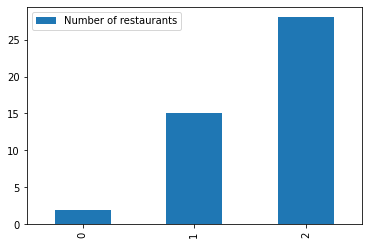

In [74]:
dfrestaurants.plot (kind= 'bar')

plt.title('Number of Italian Restaurants')
plt.xlabel('Location')
plt.ylabel('Number of restaurants')

plt.show



Let' see in which areas are in cluster 0 

First we create the dataset

In [75]:
area0 = to_merged.loc[(to_merged['Cluster Labels'] ==0) ]

In [104]:
area0 = area0.drop_duplicates(subset=['Neighborhood'])

Lets display all the area's we can open the restaurant

In [111]:
display(area0['Neighborhood'])
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

0                                                                                                                                  Agincourt
5                                                                                                                                Berczy Park
8                                 CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
6                                                                                                                Birch Cliff, Cliffside West
2                                                                                            Bathurst Manor, Wilson Heights, Downsview North
1                                                                                                                     Alderwood, Long Branch
24                                                                                                                         Downsview Central
25           

In [106]:
map_clusters = folium.Map(location=[43.7532586, -79.3296565],zoom_start=14)

# set color scheme for the clusters


# add markers to the map
markers_colors={}
markers_colors[0] = 'red'
markers_colors[1] = 'blue'
markers_colors[2] = 'green'
markers_colors[3] = 'yellow'
markers_colors[4] = 'cyan'
markers_colors[5] = 'black'
for lat, lon, cluster in zip(area0['Neighborhood Latitude'], area0['Neighborhood Longitude'], area0['Cluster Labels']):
    
    
    folium.features.CircleMarker(
        [lat, lon],
        radius=5,
       
        color =markers_colors[cluster],
        fill_color=markers_colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters